# H20ceans: Data Analysis and Machine Learning
### Using Google's AutoML API to track and predict keynote species.

#### Project Description:
Our project utilizes the Pandas Python library for dataset analysis and Google AutoML Cloud API for creating a machine learning model. The project is to be a website that allows for user-friendly analysis of data provided by the Multi-Agency Rocky Intertidal Network (MARINe). In addition, we implemented a machine learning algorithm using AutoML by Google to make predictions about the populations of an indicator species from inputs describing the conditions for the input data.

The main objective of this project was to gain familiarity with commonly used libraries and practices for the discipline we are all passionate about pursuing in the future. This was our entire groups introduction to GitHub collaboration, Pandas Python library, Matplotlib Python library, collecting and citing data from trusted sources, implementing an API, and participating in a Hackathon project.

#### Data Source:
This study utilized data collected by the Multi-Agency Rocky Intertidal Network (MARINe): a long-term ecological consortium funded and supported by many groups. Please visit pacificrockyintertidal.org for a complete list of the MARINe partners responsible for monitoring and funding these data. Data management has been primarily supported by BOEM (Bureau of Ocean Energy Management), NPS (National Parks Service), The David & Lucile Packard Foundation, and United States Navy.

marine.ucsc.edu (2019). Temperature Data | MARINe. [online] Available at: /explore-the-data/temperature/ [Accessed 18 January. 2019].

marine.ucsc.edu (2019). Long-Term Monitoring Surveys | MARINe. [online] Available at: /methods/longterm-methods [Accessed 18 January. 2019].

#### Analyzing first dataset: Marine Site Temperatures
Imports, creates, and visualizes dataframe from given csv file. Used to plot the mean temperature for each year the data was collected. This varies dependent on the location.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#reads in temp file
df = pd.read_csv("daily_temperature_means_PST.csv")

### Creates a new subset of the original data frame based on the location where the data was taken from.

In [3]:
#new df for one location
temp = df[df['marine_site_name'] == "Sage Rock"]

In [4]:
#list of unique years
yearList = temp['year'].unique()

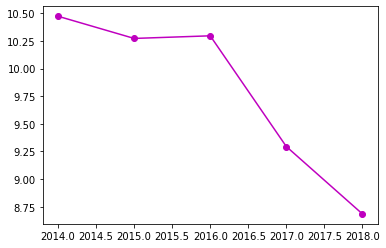

In [5]:
meanList = []
#loop to create graph data
for x in yearList:
    newdf = temp[temp['year'] == x]
    tempMean = newdf['mean'].mean()
    meanList.append(tempMean)
plt.plot(yearList, meanList, marker = "o", color = "m")

#### Analyzing second dataset: Marine Site Species Totals
Imports, creates, and visualizes dataframe from given csv file. Used to plot the totals of each species based on the location. This data is from the UCSC Boat House.

In [6]:
df = pd.read_csv('seastarkat_count_totals_download.csv')

### Creates a new subset of the original data frame based on the location where the data was taken from.

In [7]:


df = df[df['site_code'] == "BOA"]



In [8]:
animals = df['species_code'].unique()

year = df[df.columns[8]]

total = df[df.columns[14]]

In [9]:
label = animals

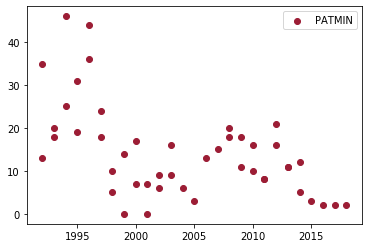

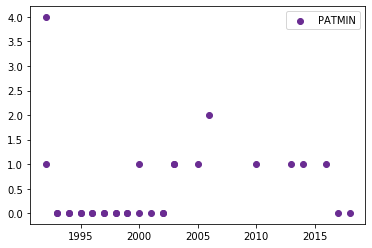

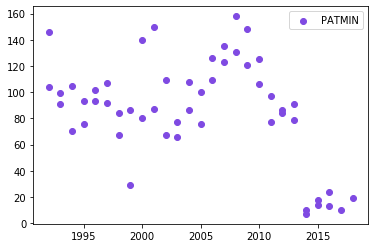

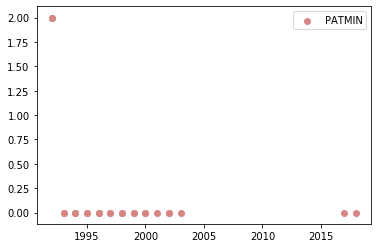

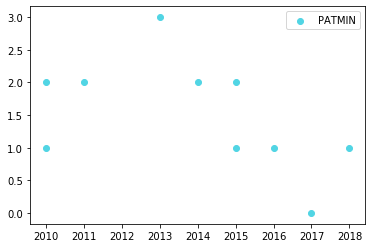

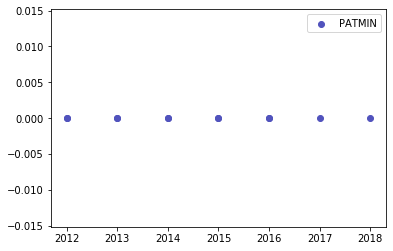

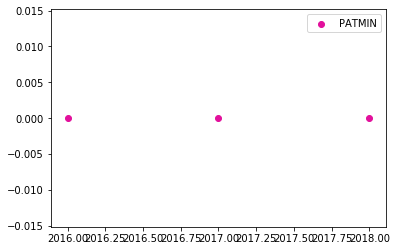

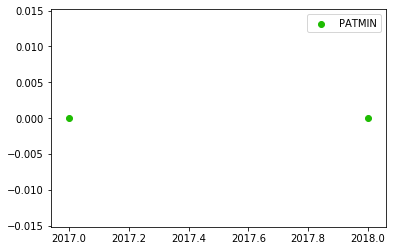

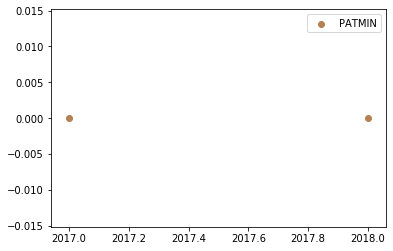

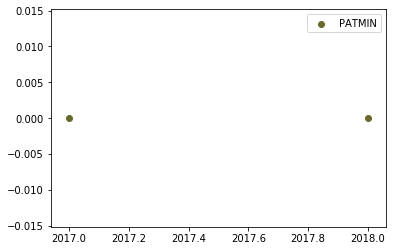

In [10]:
for x in animals:
    y=np.random.rand(3,)
    newdf = df[df['species_code'] == x]

    #print(newdf[newdf.columns[13]])
    tempTotal = newdf[newdf.columns[14]]
    tempYear = newdf[newdf.columns[8]]
    
    plt.scatter(tempYear, tempTotal, marker = "o", label=x, color = y)
    plt.legend((animals), loc='upper right')

    plt.show()


## Prepare Data Sets for Training Machine Learning Model

### Read and Trim Two Data Sets to Prepare Them for Merging Into a Combined Dataframe

In [11]:
# Create dataframe from provided CSV for temperature data
temps = pd.read_csv("daily_temperature_means_PST.csv")
# Delete unused columns
temps.drop(['processing_group', 'month', 'day', 'date', 'day_of_year' , 'time_format'], axis=1)

site_code marine_site_name   latitude  longitude  \
0           SAGE        Sage Rock  57.048700 -135.32314   
1           SAGE        Sage Rock  57.048700 -135.32314   
2           SAGE        Sage Rock  57.048700 -135.32314   
3           SAGE        Sage Rock  57.048700 -135.32314   
4           SAGE        Sage Rock  57.048700 -135.32314   
...          ...              ...        ...        ...   
228237      SRJL     Johnsons Lee  33.908718 -120.08629   
228238      SRJL     Johnsons Lee  33.908718 -120.08629   
228239      SRJL     Johnsons Lee  33.908718 -120.08629   
228240      SRJL     Johnsons Lee  33.908718 -120.08629   
228241      SRJL     Johnsons Lee  33.908718 -120.08629   

                       bioregion      island detide_method  year   n  \
0                             AK    Baranoff        height  2014  21   
1                             AK    Baranoff        height  2014  27   
2                             AK    Baranoff        height  2014  28   
3                             AK    Baranoff        height  2014  32   
4                             AK    Baranoff        height  2014  30   
...                          ...         ...           ...   ...  ..   
228237  CA Channel Islands North  Santa Rosa          tide  2017   4   
228238  CA Channel Islands North  Santa Rosa          tide  2017   4   
228239  CA Channel Islands North  Santa Rosa          tide  2017   4   
228240  CA Channel Islands North  Santa Rosa          tide  2017   4   
228241  CA Channel Islands North  Santa Rosa          tide  2017   2   

             mean    stderr  
0       14.790423  0.011932  
1       14.832654  0.020333  
2       14.363016  0.069958  
3       14.184601  0.024704  
4       14.430722  0.015525  
...           ...       ...  
228237  15.420000  0.100000  
228238  15.800000  0.260000  
228239  15.420000  0.490000  
228240  15.680000  0.090000  
228241  14.840000  0.090000  

[228242 rows x 11 columns]

In [12]:
# Create Lists for Unique Years and Sites for Sorting Purposes
yearList = temps.year.unique()
locList = temps.site_code.unique()

# New Empty Dataframe to be Filled with Averages for Each Site by Year
new_temps = pd.DataFrame(columns=['site_code', 'marine_site_name', 'latitude', 'longitude', 'bioregion', 'island', 'detide_method', 'year', 'n', 'mean', 'stderr'])

# Traverse Through List of Sites to Pull Rows from Main DF
for l in locList:
    # New DF for Specific Sites
    locdf = temps[temps["site_code"]==l]
    # Constant Column Values for Sites
    msite = locdf.iloc[0]['marine_site_name']
    lat = locdf.iloc[0]['latitude']
    longi = locdf.iloc[0]['longitude']
    breg = locdf.iloc[0]['bioregion']
    isl = locdf.iloc[0]['island']
    dmeth = locdf.iloc[0]['detide_method']
    # Traverse Through List of Years to Pull Rows from Site DF
    for y in yearList:
        # New DF for Specific Years
        yeardf = temps[temps["year"]==y]
        # Mean Values for Data by Year
        n_mean = yeardf["n"].mean()
        mean_mean = yeardf["mean"].mean()
        stderr_mean = yeardf["stderr"].mean()
        # Fills Target DF with New Average Data by Year
        new_temps.loc[len(new_temps)] = [l, msite, lat, longi, breg, isl, dmeth, y, n_mean, mean_mean, stderr_mean]
        
new_temps

site_code marine_site_name   latitude  longitude  \
0         SAGE        Sage Rock  57.048700 -135.32314   
1         SAGE        Sage Rock  57.048700 -135.32314   
2         SAGE        Sage Rock  57.048700 -135.32314   
3         SAGE        Sage Rock  57.048700 -135.32314   
4         SAGE        Sage Rock  57.048700 -135.32314   
...        ...              ...        ...        ...   
1355      SRJL     Johnsons Lee  33.908718 -120.08629   
1356      SRJL     Johnsons Lee  33.908718 -120.08629   
1357      SRJL     Johnsons Lee  33.908718 -120.08629   
1358      SRJL     Johnsons Lee  33.908718 -120.08629   
1359      SRJL     Johnsons Lee  33.908718 -120.08629   

                     bioregion      island detide_method  year          n  \
0                           AK    Baranoff        height  2014  21.492568   
1                           AK    Baranoff        height  2015  21.873577   
2                           AK    Baranoff        height  2016  21.142957   
3                           AK    Baranoff        height  2017  22.141952   
4                           AK    Baranoff        height  2018  22.384237   
...                        ...         ...           ...   ...        ...   
1355  CA Channel Islands North  Santa Rosa          tide  2001  23.862273   
1356  CA Channel Islands North  Santa Rosa          tide  2002  24.098200   
1357  CA Channel Islands North  Santa Rosa          tide  2003  24.102238   
1358  CA Channel Islands North  Santa Rosa          tide  2004  24.065896   
1359  CA Channel Islands North  Santa Rosa          tide  1999  89.188679   

           mean    stderr  
0     13.402306  0.051372  
1     13.378322  0.049925  
2     12.837564  0.054146  
3     12.379143  0.056471  
4     12.594112  0.051511  
...         ...       ...  
1355  12.576238  0.046929  
1356  12.435035  0.046635  
1357  12.762961  0.047916  
1358  12.644872  0.047783  
1359  11.639148  0.016915  

[1360 rows x 11 columns]

In [13]:
# Create dataframe from provided CSV for population data
pops = pd.read_csv("seastarkat_count_totals_download.csv")
# Delete unused columns
pops.drop(['group_code', 'season_name'], axis=1)

site_code  marine_site_name  marine_sort_order   latitude  longitude  \
0         ALEG           Alegria               6420  34.467140 -120.27738   
1         ALEG           Alegria               6420  34.467140 -120.27738   
2         ALEG           Alegria               6420  34.467140 -120.27738   
3         ALEG           Alegria               6420  34.467140 -120.27738   
4         ALEG           Alegria               6420  34.467140 -120.27738   
...        ...               ...                ...        ...        ...   
4282       WIN  Windermere Point               5180  38.523941 -123.26747   
4283       WIN  Windermere Point               5180  38.523941 -123.26747   
4284       WIN  Windermere Point               5180  38.523941 -123.26747   
4285       WIN  Windermere Point               5180  38.523941 -123.26747   
4286       WIN  Windermere Point               5180  38.523941 -123.26747   

      marine_common_season marine_season_code  year  season_sequence  \
0                       85               SP02  2002                1   
1                       87               FA02  2002                3   
2                       89               SP03  2003                1   
3                       91               FA03  2003                3   
4                       93               SP04  2004                1   
...                    ...                ...   ...              ...   
4282                   122               SU11  2011                2   
4283                   122               SU11  2011                2   
4284                   122               SU11  2011                2   
4285                   122               SU11  2011                2   
4286                   122               SU11  2011                2   

     target_assemblage method_code species_code  total mpa_designation  \
0             sea_star          IP       PISOCH    123       reference   
1             sea_star          IP       PISOCH    202       reference   
2             sea_star          IP       PISOCH    153       reference   
3             sea_star          IP       PISOCH     78       reference   
4             sea_star          IP       PISOCH     92       reference   
...                ...         ...          ...    ...             ...   
4282          sea_star          IP       KATTUN     26       reference   
4283          sea_star          IP       LEPTAS      9       reference   
4284          sea_star          IP       PATMIN      3       reference   
4285          sea_star          IP       PISOCH     23       reference   
4286          sea_star          IP       PYCHEL      1       reference   

               mpa_region         georegion  \
0             South Coast          CA South   
1             South Coast          CA South   
2             South Coast          CA South   
3             South Coast          CA South   
4             South Coast          CA South   
...                   ...               ...   
4282  North Central Coast  CA North Central   
4283  North Central Coast  CA North Central   
4284  North Central Coast  CA North Central   
4285  North Central Coast  CA North Central   
4286  North Central Coast  CA North Central   

                              bioregion state_province    island  \
0            Government Point to Mexico     California  Mainland   
1            Government Point to Mexico     California  Mainland   
2            Government Point to Mexico     California  Mainland   
3            Government Point to Mexico     California  Mainland   
4            Government Point to Mexico     California  Mainland   
...                                 ...            ...       ...   
4282  WA Olympic Coast to San Francisco     California  Mainland   
4283  WA Olympic Coast to San Francisco     California  Mainland   
4284  WA Olympic Coast to San Francisco     California  Mainland   
4285  WA Olympic Coast to San Francisco     California  Mainland   
4286  WA Olym

### Merge the Prepared Temperature and Population Dataframes to Get One Usable Set

In [15]:
# Merge by row
merge = pd.merge(new_temps, pops, on=['marine_site_name', 'year', 'site_code'])
merge

# Export new DF to CSV
# merge.to_csv("merge_data.csv")

site_code  marine_site_name  latitude_x  longitude_x bioregion_x  \
0         SAGE         Sage Rock    57.04870   -135.32314          AK   
1         SAGE         Sage Rock    57.04870   -135.32314          AK   
2         SAGE         Sage Rock    57.04870   -135.32314          AK   
3         SAGE         Sage Rock    57.04870   -135.32314          AK   
4         SAGE         Sage Rock    57.04870   -135.32314          AK   
...        ...               ...         ...          ...         ...   
2755       GPT  Government Point    34.44334   -120.45655    CA South   
2756       GPT  Government Point    34.44334   -120.45655    CA South   
2757       GPT  Government Point    34.44334   -120.45655    CA South   
2758       GPT  Government Point    34.44334   -120.45655    CA South   
2759       GPT  Government Point    34.44334   -120.45655    CA South   

      island_x detide_method  year          n       mean  ...  method_code  \
0     Baranoff        height  2014  21.492568  13.402306  ...           IP   
1     Baranoff        height  2014  21.492568  13.402306  ...           IP   
2     Baranoff        height  2014  21.492568  13.402306  ...           IP   
3     Baranoff        height  2014  21.492568  13.402306  ...           IP   
4     Baranoff        height  2015  21.873577  13.378322  ...           IP   
...        ...           ...   ...        ...        ...  ...          ...   
2755  Mainland        height  2004  24.065896  12.644872  ...           IP   
2756  Mainland        height  1999  89.188679  11.639148  ...           IP   
2757  Mainland        height  1999  89.188679  11.639148  ...           IP   
2758  Mainland        height  1999  89.188679  11.639148  ...           IP   
2759  Mainland        height  1999  89.188679  11.639148  ...           IP   

     species_code  total  mpa_designation   mpa_region  georegion  \
0          EVATRO      1              NaN          NaN         AK   
1          KATTUN     23              NaN          NaN         AK   
2          LEPTAS     64              NaN          NaN         AK   
3          PISOCH     31              NaN          NaN         AK   
4          KATTUN     24              NaN          NaN         AK   
...           ...    ...              ...          ...        ...   
2755       PISOCH    427              SMR  South Coast   CA South   
2756       PATMIN      0              SMR  South Coast   CA South   
2757       PISGIG      0              SMR  South Coast   CA South   
2758       PISOCH    120              SMR  South Coast   CA South   
2759       PYCHEL      0              SMR  South Coast   CA South   

                            bioregion_y  state_province  island_y  \
0            Alaska to British Columbia          Alaska  Baranoff   
1            Alaska to British Columbia          Alaska  Baranoff   
2            Alaska to British Columbia          Alaska  Baranoff   
3            Alaska to British Columbia          Alaska  Baranoff   
4            Alaska to British Columbia          Alaska  Baranoff   
...                                 ...             ...       ...   
2755  San Francisco to Government Point      California  Mainland   
2756  San Francisco to Government Point      California  Mainland   
2757  San Francisco to Government Point      California  Mainland   
2758  San Francisco to Government Point      California  Mainland   
2759  San Francisco to Government Point      California  Mainland   

             last_updated  
0     2019-10-31 11:29:34  
1     2019-10-31 11:29:34  
2     2019-10-31 11:29:34  
3     2019-10-31 11:29:34  
4     2019-10-31 11:29:34  
...                   ...  
2755  2019-10-31 11:29:34  
2756  2019-10-31 11:29:34  
2757  2019-10-31 11:29:34  
2758  2019-10-31 11:29:34  
2759  2019-10-31 11:29:34  

[2760 rows x 30 columns]